In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math
import time

In [3]:
# configure
inputdir = '../input/ciphertext-challenge-iii/'
outputdir = '../input/mycipher3/'

In [4]:
dftrain = pd.read_csv(inputdir+'train.csv')
dftest = pd.read_csv(inputdir+'test.csv')
print(dftrain.shape)
print(dftest.shape)
# train, test 두 개의 개수가 가탇. 10만개씩.

(108755, 3)
(108755, 3)


In [5]:
dftrain.head()
# plaintext_id, text, index 이렇게 있음. 이 index가 있음.
# 이 index와 dftest와 맵핑이 되는 것 같다. 

,plaintext_id,text,index
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149


In [6]:
dftest.head()
# ciphertext_id, ciphertext, difficulty

,ciphertext_id,ciphertext,difficulty
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4
3,ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4
4,ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3


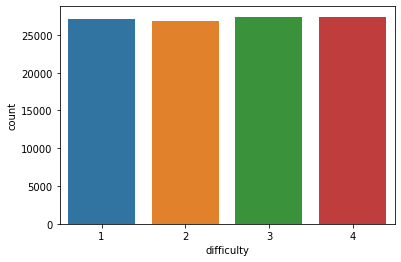

In [7]:
# count by difficulty
sns.countplot(dftest['difficulty'])
# same count. 난이도 레벨은 암호화 횟수를 의미한다.
# 균일하게 나눈 것을 알 수 있다. 난도는 1부터 4까지 있음.

In [8]:
# set length field. 텍스트 길이를 알아보자.
dftrain['length'] = dftrain.text.apply(len)
dftest['length'] = dftest.ciphertext.apply(len)
dftrain['space'] = [x.count(' ') for x in dftrain.text]
dftest['space'] = [x.count(' ') for x in dftest.ciphertext]

In [9]:
dftrain.head()

,plaintext_id,text,index,length,space
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199,50,11
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,41,8
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43,7
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39,5
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46,7


In [10]:
dftest.head()

,ciphertext_id,ciphertext,difficulty,length,space
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100,10
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764,0
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772,0
3,ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4,764,0
4,ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3,573,99


In [11]:
# difficulty level1. 레벨1부터 풀어보자.
dftest1 = dftest.loc[dftest['difficulty']==1]
dftest2 = dftest.loc[dftest['difficulty']==2]
dftest3 = dftest.loc[dftest['difficulty']==3]
dftest4 = dftest.loc[dftest['difficulty']==4]
print(len(dftest1))
dftest1.head()

27158


,ciphertext_id,ciphertext,difficulty,length,space
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100,10
5,ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...",1,100,8
19,ID_a6298da09,"0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfl...",1,100,8
20,ID_e54366f76,bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht k...,1,100,5
23,ID_ac57b8817,CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw...,1,100,6


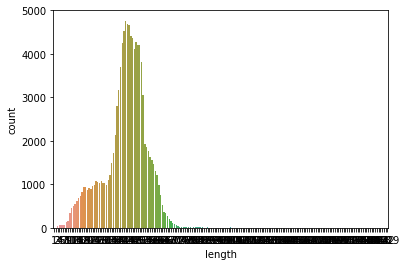

In [12]:
# 길이에 따른 카운팅. (train 원문)
sns.countplot(x="length", data=dftrain)
# 가운데 속한 부분의 길이의 데이터가 가장 많고, 길이가 긴 것들이 많은 종류로 아주 조금씩 카운트가 있다. 

# 참고)
# x값이 증가하도록 정렬: 상동
# sns.countplot(x="length", data=dftrain, order=dftrain.length.value_counts().sort_index().index)
# y값이 증가하도록 정렬
# sns.countplot(x="length", data=dftrain, order=dftrain.length.value_counts().sort_values().index)

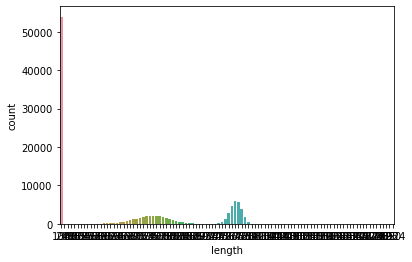

In [13]:
# 길이에 따른 카운팅을 이번에는 암호문(dftest)으로 해 본다.
sns.countplot('length', data=dftest)
# 특정 짧은 길이가 아주 많이 존재한다.

/storage/psychic/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


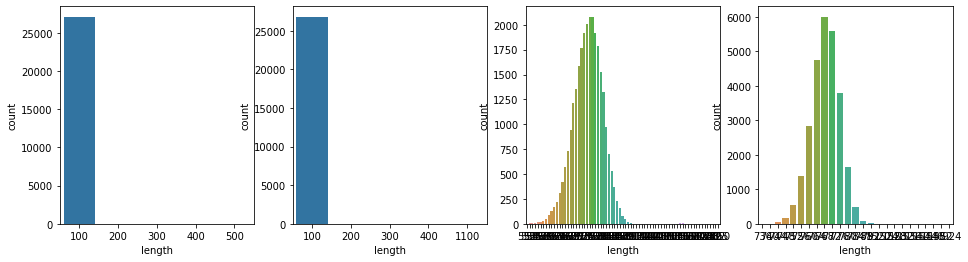

In [14]:
# 레벨별로 암호화 텍스트 길이를 보자
fig, ax = plt.subplots(1,4, figsize=(4*4, 4))
sns.countplot(x='length', data=dftest1, ax=ax[0])
sns.countplot(x='length', data=dftest2, ax=ax[1])
sns.countplot(x='length', data=dftest3, ax=ax[2])
sns.countplot(x='length', data=dftest4, ax=ax[3])
fig.show()
# 놀랍게도 level1, level2는 대부분이 고정 크기로 떨어진다. 

In [15]:
print(dftest1.length.value_counts())
print(dftest2.length.value_counts())
print(dftest3.length.value_counts())
print(dftest4.length.value_counts())

100    27120
200       28
300        8
500        1
400        1
Name: length, dtype: int64
100     26817
200        24
300         5
400         2
1100        1
Name: length, dtype: int64
576     2081
577     2079
575     2003
574     1917
578     1914
        ... 
1140       1
1161       1
1732       1
1164       1
1727       1
Name: length, Length: 71, dtype: int64
768     5999
772     5581
764     4757
776     3788
760     2836
780     1650
756     1371
752      538
784      487
748      160
788       76
744       39
792       10
1540       8
1536       7
740        6
736        3
1548       3
1544       3
1532       3
1520       2
1528       2
1524       1
1552       1
6924       1
Name: length, dtype: int64


In [16]:
## 캐릭터별 분포

In [17]:
# 모든 문자들을 모아보기

alltext = ''.join(dftrain.text)
len(alltext)

4581717

In [18]:
# 원문은 이렇게 생겼다.
alltext[:1000]

"come, who you are and what you would are out of myFor all in vain comes counsel to his ear.Captain: With the next benefit o' the wind.Smells wooingly here: no jutty, frieze,PORTIA: Which did incorporate and make us one,My tears shall wipe away these bloody marks,I have done no harm. But I remember nowVALERIA: the yarn she spun in Ulysses' absence did but fillSecond Murderer: O sir, it is better to be brief than tedious. ShowIn a most dear particular. He call'd me father:Fie, Joan, that thou wilt be so obstacle!BOTTOM: dry oats. Methinks I have a great desire to a bottleKING HENRY VI: He be approved in practise culpable.Yet know, my master, God omnipotent,True, and thy master a shepherd.CLEOPATRA: Lay me stark naked, and let the water-fliesSALISBURY: Upon the spot of this enforced cause,--For quick accumulation of renown,Nor are they livingItself, and all my treason, that I suffer'dThat you shall be new-christen'd in the Tower.Good morrow to thee, welcome:[Kneeling]but for the stuffing

Text(0.5, 1.0, 'Plain Text')

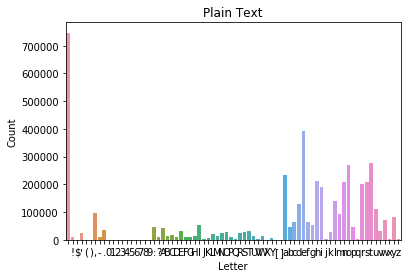

In [19]:
# 문자별 카운팅
atcounter = Counter(alltext)
dftrainletter = pd.DataFrame( [ [x[0], x[1]] for x in atcounter.items() ], columns=['Letter', 'Count'] )
# 문자를 오름차순 정렬
dftrainletter.sort_values('Letter', inplace=True)
sns.barplot(dftrainletter['Letter'], dftrainletter['Count'])
plt.title('Plain Text')
# 공백 문자가 가장 많고, 숫자가 적은것 같고, 소문자가 대문자보다 많았다.

In [20]:
dftrainletter

,Letter,Count
5,,746834
48,!,8755
65,$,1
28,',24347
61,(,1
62,),1
4,",",97592
53,-,8774
21,.,35417
71,0,1


/storage/psychic/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Plain Text Alphabet Count')

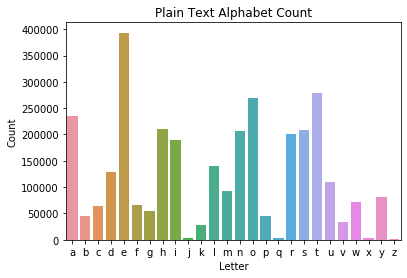

In [21]:
# 알파벳은 어떤게 일반적으로 많이 나올까?
# 일반적으로 사전에 E>T>A 순으로 나온다고 한다.
alphaCount = dftrainletter.loc[ np.bitwise_and(dftrainletter.Letter>='a' , dftrainletter.Letter<='z') ]
alphaCount.sort_values('Letter', inplace=True)
sns.barplot(alphaCount['Letter'], alphaCount['Count'])
plt.title('Plain Text Alphabet Count')
# e t o a 순서로 나온다. 대소문자 구분없이 해보자.

Text(0.5, 1.0, 'Plain Text Alphabet Uppercae Count')

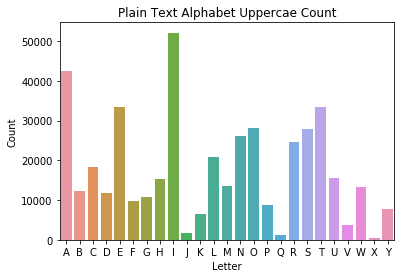

In [22]:
# 대소문자 구분없이 알파벳 분포
alphaCountU = dftrainletter.loc[ np.bitwise_and(dftrainletter.Letter>='A' , dftrainletter.Letter<='Z') ]
alphaCountU = alphaCountU.sort_values('Letter')
sns.barplot(alphaCountU['Letter'], alphaCountU['Count'])
plt.title('Plain Text Alphabet Uppercae Count')

In [23]:
if ( np.sum(alphaCountU.Letter=='Z')==0 ):
    print('no Z')
    alphaCountU = alphaCountU.append([{'Letter':'Z', 'Count':0}])
    print(alphaCountU)
# alphaCountU.Count.values

no Z
   Letter  Count
38      A  42507
41      B  12239
22      C  18290
57      D  11889
44      E  33342
17      F   9682
51      G  10653
46      H  15354
37      I  52090
47      J   1783
49      K   6573
43      L  20831
40      M  13489
50      N  26198
34      O  28037
33      P   8853
59      Q   1100
35      R  24489
29      S  27837
36      T  33454
45      U  15428
42      V   3806
25      W  13375
60      X    380
52      Y   7852
0       Z      0


Text(0.5, 1.0, 'Plain Text Alphabet Count (NoCase)')

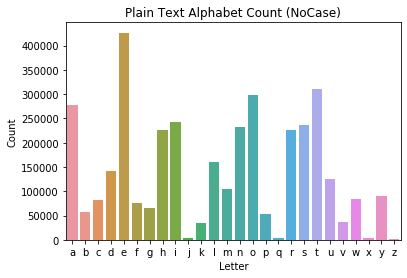

In [24]:
dfAlphaNocase = pd.DataFrame({'Letter':alphaCount['Letter'].values, 'Count':alphaCount.Count.values + alphaCountU.Count.values})
sns.barplot(dfAlphaNocase['Letter'], dfAlphaNocase['Count'])
plt.title('Plain Text Alphabet Count (NoCase)')

In [25]:
dfAlphaNocase.sort_values('Count', ascending=False)
# e >> t o a 순서로 일치한다.

,Letter,Count
4,e,426641
19,t,311598
14,o,297920
0,a,276725
8,i,242319
18,s,235543
13,n,232927
17,r,225892
7,h,225804
11,l,161162


In [26]:
# 전체 암호문
allcipher = ''.join(dftest.ciphertext)

# level 1 암호문도 한 번 동일하게 분석
allcipher1 = ''.join(dftest1.ciphertext)
print( 'length=' , len(allcipher1) )
print( 'ciphers=', allcipher1[:1000] )

length= 2720900
ciphers= H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-FhPv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKqbN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht ktjt-glvchyk wdlaxmpwi-ogKAan17gjP.QJd[w1- rui]xICalV9vCPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[j-?xWsIxuFxx1bgN,,:,VlU[-w'F,LM[)nxyX]X baybc iibk qshapeh's.i-:XI 7Q11to$GvVMvbYPb0rF,M1V3wwzFi-G5JTte:d)9f894Ch'4Q[Pd2Q1$yaqA..PSsal4HUwlLhOvelts, dnd xwng??Pj)L1yY,OF-FOj.hSMEfi5?yeeOp3igo56gvz0IMojTC]L$82qJF.TU2XuN?(z]mwA!mWPmbdadXe ssit ssi hdph xr lw jgp spj:Cv5guUm!8E3r4H,q$TucLMLeop$Ywk1RzC]W]zp'4ww,VM'C'3YS)J6tHjhUApkprjhyi'i olkt, yyh idyx, X ssmdj, qvel Bvespyi.bJUroPl8dSaB9V!wGWKNXsAGTLhDvJNlTK?cXgEqO)h?LIUhSNXMJHGW TMAFPQMYI: Glh vnyi jn rezt ny Gbdatpsde jn

Text(0.5, 1.0, 'Cipher Level1')

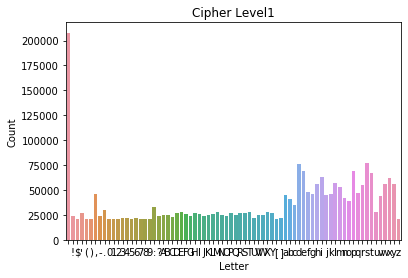

In [27]:
# 문자별 카운팅
accounter1 = Counter(allcipher1)
dftestletter1 = pd.DataFrame( [ [x[0], x[1]] for x in accounter1.items() ], columns=['Letter', 'Count'] )
# 문자를 오름차순 정렬
dftestletter1 = dftestletter1.sort_values('Letter')
sns.barplot(dftestletter1['Letter'], dftestletter1['Count'])
plt.title('Cipher Level1')
# 공백 문자가 가장 많고, 숫자가 대문자 만큼 빈도가 증가했다.  소문자가 대문자보다 많았다.

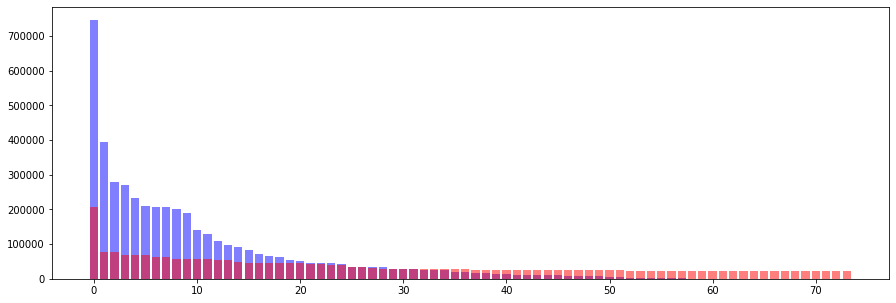

In [28]:
# 두 그래프를 겹쳐보자. 물론 레터가 암호화로 변경되었을테니까.
# 레터를 x축으로 해서 그대로 겹치는 것은 의미없다. 
# x축을 빈도순으로 정렬해서 보자. 빈도는 비슷할까?
# 이것도 문제는 있는 것이 level1의 train data를 사용해야 정확하게 볼 수 있다. 근데 그것을 알 수 없다.

dftrainletter = dftrainletter.sort_values(by='Count', ascending=False) # 빈도 내림차순 정렬
dftestletter1 = dftestletter1.sort_values(by='Count', ascending=False) # 빈도 내림차순 정렬

f, ax = plt.subplots(figsize=(15,5))
plt.bar(np.array(range(len(dftrainletter))), dftrainletter['Count'].values , alpha=0.5, color='blue')
plt.bar(np.array(range(len(dftestletter1))), dftestletter1['Count'].values , alpha=0.5, color='red')
plt.show()
# 암호화가 되면 빈도차이가 확연히 줄어든 것을 알 수 있다. 

Text(0.5, 1.0, 'Cipher All')

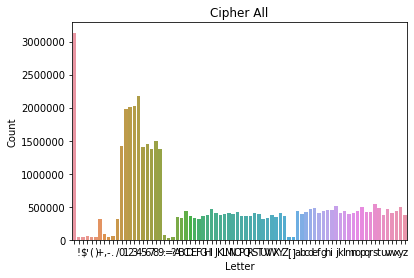

In [29]:
# 문자별 카운팅 (전체 암호문)
accounter = Counter(allcipher)
dftestletter = pd.DataFrame( [ [x[0], x[1]] for x in accounter.items() ], columns=['Letter', 'Count'] )
# 문자를 오름차순 정렬
dftestletter = dftestletter.sort_values('Letter')
sns.barplot(dftestletter['Letter'], dftestletter['Count'])
plt.title('Cipher All')
# 공백 문자가 가장 많고, 숫자가 많이 발생했고, 대소문자가 비슷하게 분포했다. 특수문자는 적음.

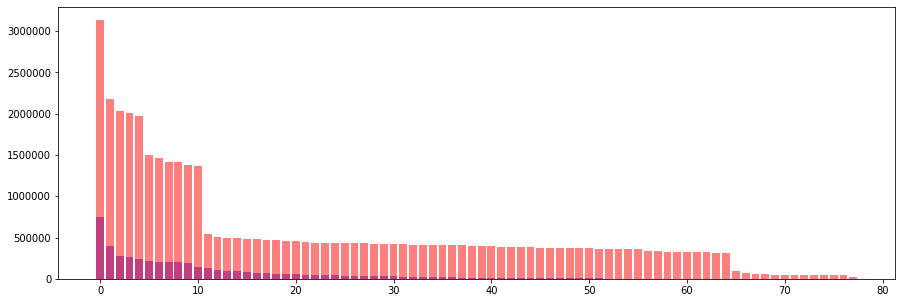

In [30]:
dftrainletter = dftrainletter.sort_values(by='Count', ascending=False) # 내림차순 정렬
dftestletter = dftestletter.sort_values(by='Count', ascending=False) # 내림차순 정렬

f, ax = plt.subplots(figsize=(15,5))
plt.bar(np.array(range(len(dftrainletter))), dftrainletter['Count'].values , alpha=0.5, color='blue')
plt.bar(np.array(range(len(dftestletter))), dftestletter['Count'].values , alpha=0.5, color='red')
plt.show()

In [31]:
dftest1.length.sort_values(ascending=False).head()

45272    500
95019    400
91852    300
94408    300
35086    300
Name: length, dtype: int64

In [32]:
# 45272번이 유일하게 레벨1 암호문의 길이가 500이다.
dftest1.loc[45272].ciphertext

"gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs Flvjdd wfdloizmXnS8"

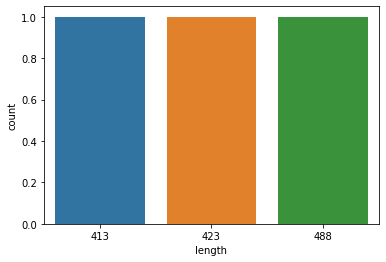

In [33]:
# 위 암호문의 평문은 이보다 짧은 길이일 것이다. 100단위로 랜덤패딩하여 변환이 되기 때문인데, 따라서 범위가 나온다.
# 암호문의 길이가 500이면 평문의 길이의 범위는 401~500
sns.countplot(x="length", data=dftrain.loc[np.bitwise_and(dftrain.length.values<=500,dftrain.length.values>400)])

In [34]:
# 평문의 길이가 401~500인 것을 조회.
maybe500 = dftrain.loc[np.bitwise_and(dftrain.length.values<=500,dftrain.length.values>400)]
print(maybe500)
# 후보가 3개 존재한다. 이 셋 중에 하나가 해당 암호문의 원문이다 

        plaintext_id                                               text  \
13862   ID_f000cad17  Porter: Enter trumpets, sounding, then two Ald...   
67817   ID_083ddb1e0  Solemn music. Enter, as in an apparition,  SIC...   
104540  ID_a1b257ad8  GOWER: Enter, PERICLES and SIMONIDES at one do...   

        index  length  space  
13862   43382     488     81  
67817   31644     423     74  
104540  76893     413     73  


In [35]:
''' compare two string. letter freq
두 스트링에 포함된 문자의 빈도 비교. x축은 문자순 sort
t1, t2 : 비교 스트링
l1, l2 : labels
'''
def compare_letter(t1, t2, l1=None, l2=None):
    # make same length
#     print('length=', len(t1), len(t2))
#     if len(t1)<len(t2):
#         t2 = t2[:len(t1)]
#     else:
#         t1 = t1[:len(t2)]
    print('compare length=', len(t1), len(t2))
    alpha = [ chr(ord('a')+i) for i in range(26) ]
    alpha.extend([ chr(ord('A')+i) for i in range(26) ] )
    alpha.extend([' ', "'", ',', '-' '.', ':', '!', '$', '(', ')', '?', '[', ']'])
    alpha.extend([ str(i) for i in range(10)])

    lettercnt = len(alpha)
    
    counter1 = Counter(t1)
    dfc1 = pd.DataFrame( {'Letter':alpha, 'Count':np.zeros(lettercnt, dtype=int)})
    for x in counter1.items():
        dfc1.loc[dfc1.Letter == x[0], 'Count'] = x[1]
    dfc1 = dfc1.sort_values('Letter')

    counter2 = Counter(t2)
    dfc2 = pd.DataFrame( {'Letter':alpha, 'Count':np.zeros(lettercnt, dtype=int)})
    for x in counter2.items():
        dfc2.loc[dfc2.Letter == x[0], 'Count'] = x[1]
    dfc2 = dfc2.sort_values('Letter')
    
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=70)
    sns.barplot(dfc1['Letter'], dfc1['Count'], color='blue', alpha=0.5, label=l1)
    sns.barplot(dfc2['Letter'], dfc2['Count'], color='red', alpha=0.5, label=l2)
    plt.legend()
    plt.show()


In [36]:
''' compare two string. letter freq
두 스트링에 포함된 문자의 빈도 비교. x축은 빈도순 sort
'''
def compare_freq(t1, t2, l1=None, l2=None):
    # make same length
#     print('length=', len(t1), len(t2))
#     if len(t1)<len(t2):
#         t2 = t2[:len(t1)]
#     else:
#         t1 = t1[:len(t2)]
    print('compare length=', len(t1), len(t2))
    alpha = [ chr(ord('a')+i) for i in range(26) ]
    alpha.extend([ chr(ord('A')+i) for i in range(26) ] )
    alpha.extend([' ', "'", ',', '-' '.', ':', '!', '$', '(', ')', '?', '[', ']'])
    alpha.extend([ str(i) for i in range(10)])
    lettercnt = len(alpha)
    
    counter1 = Counter(t1)
    dfc1 = pd.DataFrame( {'Letter':alpha, 'Count':np.zeros(lettercnt, dtype=int)})
    for x in counter1.items():
        dfc1.loc[dfc1.Letter == x[0], 'Count'] = x[1]
    dfc1 = dfc1.sort_values('Count', ascending=False)

    counter2 = Counter(t2)
    dfc2 = pd.DataFrame( {'Letter':alpha, 'Count':np.zeros(lettercnt, dtype=int)})
    for x in counter2.items():
        dfc2.loc[dfc2.Letter == x[0], 'Count'] = x[1]
    dfc2 = dfc2.sort_values('Count', ascending=False)
    
    plt.figure(figsize=(12, 8))
    xvalue = list(range(lettercnt))
    plt.xticks(rotation=70)
    sns.barplot(xvalue, dfc1['Count'], color='blue', alpha=0.5, label=l1)
    sns.barplot(xvalue, dfc2['Count'], color='red', alpha=0.5, label=l2)
    plt.legend()
    plt.show()


compare length= 500 488


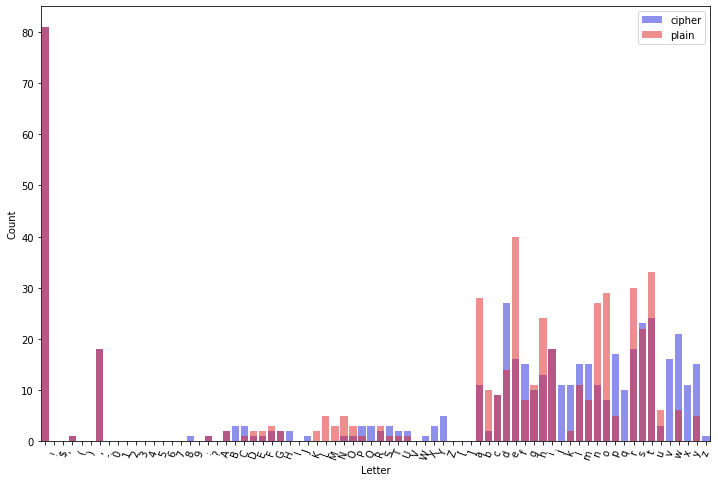

In [37]:
compare_letter(dftest1.loc[45272].ciphertext, dftrain.loc[13862].text, 'cipher', 'plain')
# 공백과 특수문자부분이 정확히 일치하였다!!! 
# 이 암호문과 평문이 매칭될 것으로 추정한다!!!

compare length= 500 488


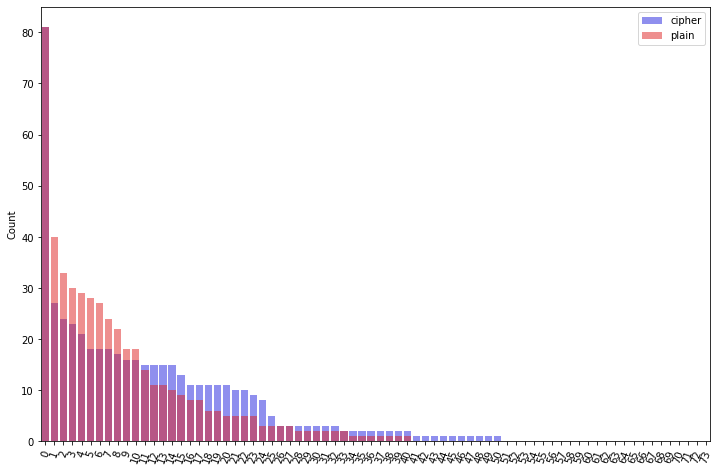

In [38]:
compare_freq(dftest1.loc[45272].ciphertext, dftrain.loc[13862].text, 'cipher', 'plain')

In [39]:
# 특수문자의 개수 일치
print(dftest1.loc[45272].ciphertext.count(' '))
print(dftrain.loc[13862].text.count(' '))
print(dftest1.loc[45272].ciphertext.count('\''))
print(dftrain.loc[13862].text.count('\''))
print(dftest1.loc[45272].ciphertext.count(','))
print(dftrain.loc[13862].text.count(','))
print(dftest1.loc[45272].ciphertext.count('-'))
print(dftrain.loc[13862].text.count('-'))
print(dftest1.loc[45272].ciphertext.count('.'))
print(dftrain.loc[13862].text.count('.'))
# 우연의 일치일까???

81
81
1
1
18
18
2
2
2
2


compare length= 500 423


No handles with labels found to put in legend.


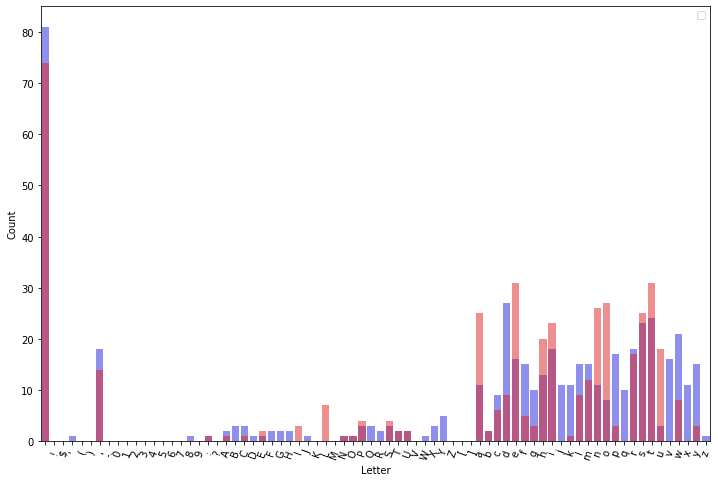

In [40]:
compare_letter(dftest1.loc[45272].ciphertext, dftrain.loc[67817].text)

compare length= 500 413


No handles with labels found to put in legend.


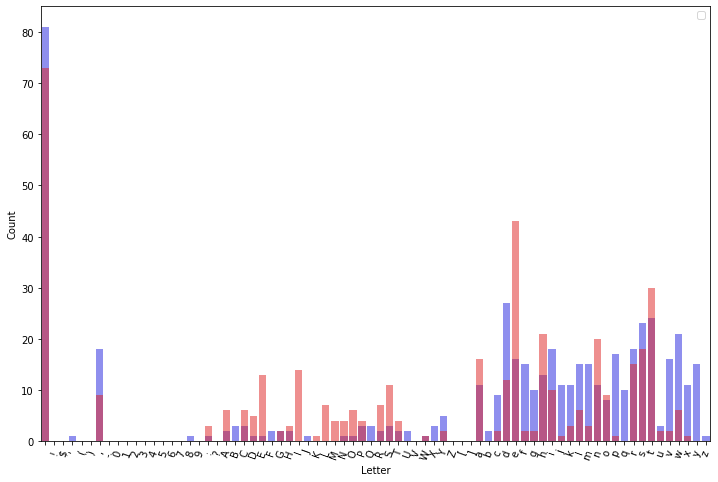

In [41]:
compare_letter(dftest1.loc[45272].ciphertext, dftrain.loc[104540].text)

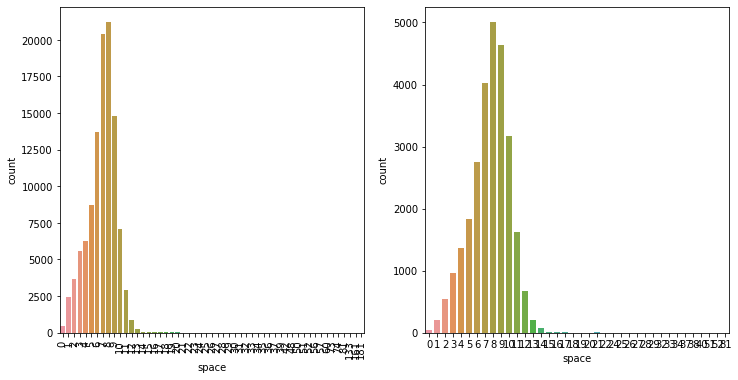

In [42]:
# 공백과 특수문자는 암호화하지 않고 유지되는가???
# 스페이스 카운트 분포
plt.figure(figsize=(6*2, 6))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot('space', data=dftrain)
plt.subplot(1,2,2)
sns.countplot('space', data=dftest1)
plt.show()
# 암호문 레벨1과 평문(레벨1~4총합)의 비교

In [43]:
# 첫 번째 매칭 결과
print('plain:\n', dftrain.loc[13862].text)
print('cipher level1:\n', dftest1.loc[45272].ciphertext)

plain:
 Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks
cipher level1:
 gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs Flvjdd

In [44]:
# 위 결과. 특수문자와 공백은 변하지 않고, 계속 순서와 개수가 유지되고 있음을 알 수 있다.
# 첫글자가 대문자이면 암호문도 거의(정확하지는 않다. 앞에 소문자 패딩이 들어간 케이스 존재) 첫글자가 대문자인 것으로 보아,
# 대문자는 대문자로 소문자는 소문자로 변환되는 것 같고, 랜덤 스트링 패딩은 시작과 끝 양쪽에 존재하는 것으로 보인다.(규칙이 맞지 않는 부분.)
# 단어별로 처리되는 것 같다. 단어 개수는 동일. 
# 패딩에는 공백이나 특수문자로 구성되지 않는 것 같다. => 아님. 포함될 수 있는 것으로 확인.

In [45]:
# 접근 방법: 특수문자들만 추출하고, 대문자는 대문자A, 소문자는 소문자a로 만든다.
# plain과 cipher level1의 매칭을 시도. 어떤 특수문자인지도 파악이 필요.

In [46]:

def is_white(n):
    if n==' ' or n==',' or n==':' or n=='.' or n=='?' or n=='$' or n=='\'' or \
            n=='(' or n==')' or n=='[' or n==']':
        return True
    return False

def include_white(s):
    for x in s:
        if is_white(x):
            return True
    return False

# 공백,특수문자만을 남긴다.
def get_sp(text):
    sp=""
    # 시작문자 공백은 오차가 있는 것 같아 모두 제거.
#     temp = text.lstrip().rstrip()
    for n in text:
#         if not n.isalnum()
#             sp+=n
        # 처음에는 isalnum만 시도했다가 아래에 시행착오가 나와서 이렇게 업데이트.
#         if not n.isalnum() and n!='(' and n!=')' and n!='[' and n!=']' and n!='$' and n!=':' and n!='\'' and n!='-':
# . , 
#     alpha.extend([' ', "'", ',', '-' '.', ':', '!', '$', '(', ')', '?', '[', ']'])
#         if n==' ' or n==',' or n==':':
# not work letter :   ! -  
        if is_white(n) :
            sp+=n
        elif n.islower():
            sp+='a'
        elif n.isupper():
            sp+='A'
        else:
            sp+='X'  # unknown
#             print('unknown : ', n)
    return sp 

In [47]:
# 패턴 일치 여부 검사. 패딩을 계산하여 제외시킨다.
# e ; cipher text
# p ; plain text

def isSamePattern(e, p, bdebug=False):
    # e에는 패딩이 숨이있다. 길이는 자체로는 알 수 없다. 비교시에 알 수 있다.
    encsize = math.ceil(len(p)/100)*100
    padsize = encsize-len(p)
    # check length match
    if encsize!=len(e):
        if bdebug:
            print('length error: len(p)={} encsize={}, len(e)={}'.format(len(p), encsize, len(e)))
        return False
    if bdebug:
        print(e)
        print(p)
        print(encsize, len(e), len(p))
    lpad = padsize//2
    rpad = padsize-lpad
    if bdebug:
        print(padsize, lpad, rpad)
    lpadblock = e[0:lpad]
    rpadblock = e[encsize-rpad:]
    if len(lpadblock)>0:
        if lpadblock[-1]==' ':
            return False
    if len(rpadblock)>0:
        if rpadblock[0]==' ':
            return False
    if bdebug:
        print(lpadblock)
        print(rpadblock)
#     if include_white(lpadblock):
#         return False
#     if include_white(rpadblock):
#         return False
    encblock = e[lpad:encsize-rpad]
    if bdebug:
        print(p)
        print(encblock)
    sp_e = get_sp(encblock)
    sp_p = get_sp(p)
    if bdebug:
        print(sp_e)
        print(sp_p)
    return sp_e==sp_p


In [48]:
# 5 ciphertext_id= ID_ac57b8817
# found plain_id= ['ID_a5bac1c5c', 'ID_1f08db396', 'ID_991f7a466', 'ID_d1ad40723']
c=dftest1.loc[ dftest1.ciphertext_id=='ID_ac57b8817']['ciphertext'].values[0]
t=dftrain.loc[dftrain.plaintext_id=='ID_1f08db396']['text'].values[0]
isSamePattern(c,t,True)

CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[
go
100 100 2
98 49 49
CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, q
f khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[
go
er
aa
aa


True

In [49]:
# x1=get_sp(dftrain.loc[13862].text)
# x2=get_sp(dftest1.loc[45272].ciphertext)
# print(x1)
# print(x2)
# print(x1==x2)
# 특수문자 배열이 일치하고 있음
print(isSamePattern(dftest1.loc[45272].ciphertext,dftrain.loc[13862].text, True))

gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs Flvjdd wfdloizmXnS8
Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks
500 500 48

In [50]:
if False:
    temp1=dftest1.ciphertext.apply(get_sp)
    dftest1["sp"]=temp1.copy()
    print(dftest1.head())

    temp2 = dftrain.text.apply(get_sp)
    dftrain["sp"]=temp2.copy()
    print(dftrain.head())

    print(len(dftest1.sp))
    dftrain.head()

In [51]:
print(dftrain.loc[13862].text)
print(dftest1.loc[45272].ciphertext)
cipher = dftest1.iloc[2].ciphertext
clen = len(cipher)
print(cipher)
dftrainflag=np.bitwise_and(dftrain['length']>(clen-100), dftrain['length']<=clen)
print('trainlength=', np.sum(dftrainflag))
for pid, plain in zip(dftrain.loc[dftrainflag]['plaintext_id'], 
                      dftrain.loc[dftrainflag]['text']):
#             print(cipher, plain)
    if isSamePattern(cipher, plain):
        print('found:', pid)
        print(plain)
#         break
        

Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks
gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs Flvjdd wfdloizmXnS8
0W,jz:pH(z

In [52]:
# dftrain.head()
# dftrain.loc[ np.bitwise_and(dftrain['length']>100, dftrain['length']<=200) ] 

In [53]:
# search sp pattern
foundpair1 = [] # test1 idx, train idx
notfoundpair1=[]
foundcnt=0
dftest1_count = dftest1.shape[0]
dftrain_count = dftrain.shape[0]
print('test1 count=', dftest1_count, 'train count=', dftrain_count)

if not os.path.exists(outputdir+'foundpair1.csv') or True:
    foundcnt=0
    i2=0
    time_s = time.time()
    for (ciphertext_id, cipher) in zip(dftest1.ciphertext_id.values, dftest1.ciphertext.values):
        matched=[]
        matchedidx=[]
        i2+=1
        # comment below, if u want to get all answers.
#         if i2==20 :  # debug 
#             break
        time_s1 = time.time()
        print(i2,'/',dftest1_count, 'ciphertext_id=', ciphertext_id, cipher)
        clen = len(cipher)
        dftrainflag=np.bitwise_and(dftrain['length']>(clen-100), dftrain['length']<=clen)
        for pid, pidx, plain in zip(dftrain.loc[dftrainflag]['plaintext_id'].values, dftrain.loc[dftrainflag]['index'].values,
                              dftrain.loc[dftrainflag]['text'].values):
#             print(cipher, plain)
            if isSamePattern(cipher, plain):
                matched.append(pid)
                matchedidx.append(str(pidx))
        time_e1 = time.time()
        if len(matched)==0 :
            print('not found. elapsed=', time_e1-time_s1)
            notfoundpair1.append(ciphertext_id)
        if len(matched)>=1 :
            foundcnt+=1
            print('found plain_id=', matched, matchedidx, 'elapsed=', time_e1-time_s1, 'remain=', (dftest1_count-i2)* ((time_e1-time_s)/i2)/60, 'Min' )
            foundpair1.append( [ciphertext_id, ','.join(matched), ','.join(matchedidx), len(matched)] )
    time_e = time.time()
    print('avg time per one cipher to find plain : ', (time_e-time_s)/i2, (time_e-time_s)/3600, 'Hours' )
    print('foundcnt=', foundcnt)
    
    # save found data
    if True:
        dffoundpair1 = pd.DataFrame(foundpair1, columns=['ciphertext_id', 'plaintext_id', 'plaintext_index', 'count'])
        dffoundpair1.to_csv('foundpair1.csv')
        dfnotfoundpair1 = pd.DataFrame(notfoundpair1, columns=['ciphertext_id'])
        dfnotfoundpair1.to_csv('notfoundpair1.csv')
else:
    print('load foundpair1.csv')
    dffoundpair1 = pd.read_csv(outputdir+'foundpair1.csv')

test1 count= 27158 train count= 108755
1 / 27158 ciphertext_id= ID_4a6fc1ea9 H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh
found plain_id= ['ID_cb729587d'] ['32777'] elapsed= 2.0336976051330566 remain= 920.5137040456136 Min
2 / 27158 ciphertext_id= ID_c85d54d74 Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P
found plain_id= ['ID_75a4f4ea0'] ['55493'] elapsed= 2.094719171524048 remain= 934.3064157009125 Min
3 / 27158 ciphertext_id= ID_a6298da09 0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKq
found plain_id= ['ID_75c27b01a'] ['7421'] elapsed= 2.258979320526123 remain= 963.660926858584 Min
4 / 27158 ciphertext_id= ID_e54366f76 bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht ktjt-glvchyk wdlaxmpwi-ogKAan17gjP.QJd[w1- rui]xICalV9v
found plain_id= ['ID_b4531b8f6'] ['79389'] elapsed= 2.47184681892395 remain= 1002.406669118007 Min
5 / 271

In [54]:
print( (dftest1.shape[0] * 5)/3600, ' Hours' )
# 37.7hour!!!

# 3hour?
print (3*3600/5)

37.71944444444444  Hours
2160.0


In [55]:
def get_plaintext(pid):
    return dftrain.loc[ dftrain['plaintext_id']==pid ].text.values[0]
def get_ciphertext(cid):
    return dftest1.loc[ dftest1['ciphertext_id']==cid ].ciphertext.values[0]

def print_compare(pid, cid):
    print('plaintext_id={} ciphertext_id={}'.format(pid, cid))
    ptext = get_plaintext(pid)
    ctext = get_ciphertext(cid)
    tlen = len(ptext)
    encsize = math.ceil(tlen/100)*100
    padsize = encsize - tlen
    padsizel = padsize//2
    padsizer = padsize - padsizel
    print(' '*padsizel+ptext)
    print(ctext)

In [56]:
'''
2 ciphertext_id= ID_c85d54d74 Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P
trainlength= 108601
found plain_id= ['ID_1f08db396', 'ID_75a4f4ea0']

5 ciphertext_id= ID_ac57b8817 CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[
trainlength= 108601
found plain_id= ['ID_a5bac1c5c', 'ID_1f08db396', 'ID_991f7a466', 'ID_d1ad40723']
'''
c=dftest1.loc[ dftest1.ciphertext_id=='ID_ac57b8817']['ciphertext'].values[0]
t=dftrain.loc[dftrain.plaintext_id=='ID_991f7a466']['text'].values[0]
print(isSamePattern(c,t,True))

c=dftest1.loc[ dftest1.ciphertext_id=='ID_ac57b8817']['ciphertext'].values[0]
t=dftrain.loc[dftrain.plaintext_id=='ID_d1ad40723']['text'].values[0]
print(isSamePattern(c,t,True))
# 자세히 보니, 패딩의 특징은 실제 문장쪽에 공백이 오지 않는다.


CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[
Accept this scroll, most gracious sovereign,
100 100 44
56 28 28
CPuqjMj5$tOcHNthUki.'9LMNaAO
rMJjGs$XVstbh 7,JRf)M9cI3Ix[
Accept this scroll, most gracious sovereign,
Erbptj ssmi rnvekw, qerf khynmete weupvthrr,
Aaaaaa aaaa aaaaaa, aaaa aaaaaaaa aaaaaaaaa,
Aaaaaa aaaa aaaaaa, aaaa aaaaaaaa aaaaaaaaa,
True
CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[
that
100 100 4
96 48 48
False


In [57]:
dffoundpair1

,ciphertext_id,plaintext_id,plaintext_index,count
0,ID_4a6fc1ea9,ID_cb729587d,32777,1
1,ID_c85d54d74,ID_75a4f4ea0,55493,1
2,ID_a6298da09,ID_75c27b01a,7421,1
3,ID_e54366f76,ID_b4531b8f6,79389,1
4,ID_ac57b8817,"ID_1f08db396,ID_991f7a466","2129,4603",2
5,ID_2859e72b6,"ID_2765f020d,ID_2e6366465","30171,20053",2
6,ID_e11e58c6d,ID_c3ccfaffd,24329,1
7,ID_d0e1bacd3,ID_7c81b10fd,31150,1
8,ID_946569d55,"ID_89f8366fb,ID_1f08db396","105733,2129",2
9,ID_40509de62,ID_791f0be9c,19505,1


In [58]:
# sns.countplot(x='count', data=dffoundpair1)
# sns.boxplot(x='count', data=dffoundpair1)
# dffoundpair1.describe()
print(sum(dffoundpair1['count'].values==1))
dftest1.head()

15


,ciphertext_id,ciphertext,difficulty,length,space
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100,10
5,ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...",1,100,8
19,ID_a6298da09,"0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfl...",1,100,8
20,ID_e54366f76,bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht k...,1,100,5
23,ID_ac57b8817,CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw...,1,100,6


In [60]:
dftrain.head()

,plaintext_id,text,index,length,space
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199,50,11
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,41,8
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43,7
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39,5
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46,7


In [61]:
def plaintext_index(plaintext_id):
    return dftrain.loc[dftrain['plaintext_id']==plaintext_id]['index'].values[0]

plaintext_index('ID_2058482ae')

79081

In [59]:
dffoundpair = dffoundpair1.loc[dffoundpair1['count']==1]
print(dffoundpair1.shape, dffoundpair.shape)

(19, 4) (15, 4)


In [63]:
def count_upper(strtemp):
    return sum(1 for c in strtemp if c.isupper())
def diff_char(c, d):
    v = ord(d)-ord(c)
#     if v<0 :
#         v+=26  # 혹시 26 characters rotation?
    if v<0 :
        v+=25  # -와 +의 차이를 보니 25
    return v
def diff_str(c,d, skipzero=0):
    dl = []
    c2=[]
    d2=[]
    for c1,d1 in zip(c,d):
        le = diff_char(c1,d1)
        if skipzero==1 and le==0:
            pass
        else:
            dl.append(le)
            c2.append(c1)
            d2.append(d1)
#     print(dl)
    return dl, c2, d2

# tlen= plain text length
def remove_padding(ciphertext, tlen):
    encsize = math.ceil(tlen/100)*100
    padsize = encsize - tlen
    padsizel = padsize//2
    padsizer = padsize - padsizel
    cipher_strip = ciphertext[padsizel:encsize-padsizer]
#     print(ciphertext, cipher_strip, padsizel, tlen, padsizer)
    return cipher_strip

def print4(s, p, c):
    offset=0
    for i in range(len(s)//4+1):
        print(s[i*4:(i+1)*4], p[i*4:(i+1)*4], c[i*4:(i+1)*4])

def compare_diff(plaintext, ciphertext_org, debug=False):
    ciphertext = remove_padding(ciphertext_org, len(plaintext))
    p1 = plaintext.split()
    c1 = ciphertext.split()
    
    encsize = math.ceil(len(plaintext)/100)*100
    padsize = encsize - len(plaintext)
    padsizel = padsize//2
    padsizer = padsize - padsizel
    
    linenum=0
    prepadding=ciphertext_org[:padsizel]
    postpadding=ciphertext_org[encsize-padsizer:]
    diffstring=[]
    diffplain=[]
    diffcipher=[]
    for pt, ct in zip(p1, c1):
        linenum+=1
        if debug:
            print(pt,'<==>', ct)
        arr, c2, d2 = diff_str(pt, ct, 1)
        diffstring += arr
        diffplain += c2
        diffcipher += d2
    if debug:
        print4(diffstring, diffplain, diffcipher)
        print('wordcnt=', len(p1), len(c1), 'plainlen=', len(plaintext))
        print(p1)
        print(c1)
        print('pad1=', len(prepadding), prepadding)
        print('pad2=', len(postpadding), postpadding)
        
    return diffstring

In [64]:
dffoundpair1.loc[dffoundpair1["count"]!=1].head(5)

,ciphertext_id,plaintext_id,plaintext_index,count
4,ID_ac57b8817,"ID_1f08db396,ID_991f7a466","2129,4603",2
5,ID_2859e72b6,"ID_2765f020d,ID_2e6366465","30171,20053",2
8,ID_946569d55,"ID_89f8366fb,ID_1f08db396","105733,2129",2
18,ID_44015ac0d,"ID_a5bac1c5c,ID_1f08db396,ID_0cf648ed1,ID_d1ad...","33509,2129,13917,20138",4


In [65]:
c = get_ciphertext('ID_ac57b8817')
p1 = get_plaintext('ID_1f08db396')
p2 = get_plaintext('ID_991f7a466')

diffpat = compare_diff(p2,c, True)
# not found key pattern.

Accept <==> Erbptj
this <==> ssmi
scroll, <==> rnvekw,
most <==> qerf
gracious <==> khynmete
sovereign, <==> weupvthrr,
[4, 15, 24, 11] ['A', 'c', 'c', 'e'] ['E', 'r', 'b', 'p']
[4, 15, 24, 11] ['p', 't', 't', 'h'] ['t', 'j', 's', 's']
[4, 15, 24, 11] ['i', 's', 's', 'c'] ['m', 'i', 'r', 'n']
[4, 15, 24, 11] ['r', 'o', 'l', 'l'] ['v', 'e', 'k', 'w']
[4, 15, 24, 11] ['m', 'o', 's', 't'] ['q', 'e', 'r', 'f']
[4, 15, 24, 11] ['g', 'r', 'a', 'c'] ['k', 'h', 'y', 'n']
[4, 15, 24, 11] ['i', 'o', 'u', 's'] ['m', 'e', 't', 'e']
[4, 15, 24, 11] ['s', 'o', 'v', 'e'] ['w', 'e', 'u', 'p']
[4, 15, 24, 11] ['r', 'e', 'i', 'g'] ['v', 't', 'h', 'r']
[4] ['n'] ['r']
wordcnt= 6 6 plainlen= 44
['Accept', 'this', 'scroll,', 'most', 'gracious', 'sovereign,']
['Erbptj', 'ssmi', 'rnvekw,', 'qerf', 'khynmete', 'weupvthrr,']
pad1= 28 CPuqjMj5$tOcHNthUki.'9LMNaAO
pad2= 28 rMJjGs$XVstbh 7,JRf)M9cI3Ix[


In [66]:
diffpat = set(diffpat)
print(diffpat)
if diffpat.issubset(set([4,15,24,11])):
    print('pattern!')
else:
    print('no pattern!')

{24, 11, 4, 15}
pattern!


In [110]:
dffoundpair1_multi=dffoundpair1.loc[dffoundpair1["count"]!=1]
dffoundpair1_adjust = []
for i in range(dffoundpair1_multi.shape[0]):
    cid = dffoundpair1_multi.iloc[i]['ciphertext_id']
    pids = dffoundpair1_multi.iloc[i]['plaintext_id']
    pidxs = dffoundpair1_multi.iloc[i]['plaintext_index']
    pidsa = pids.split(',')
    pidxsa = pidxs.split(',')
    bfound=False
    for pid, pidx in zip(pidsa, pidxsa):
        c = get_ciphertext(cid)
        p = get_plaintext(pid)
        diffpat = set(compare_diff(p,c, False))
        print(diffpat)
        if diffpat.issubset(set([4,15,24,11])):
            bfound=True
    if bfound:
        print('cid=', cid, ' pid=', pid, 'pidx-', pidx)
        dffoundpair1_adjust.append([cid, pidx])
    else:
        print('cid=', cid, ' not found')


{3, 23}
{24, 11, 4, 15}
cid= ID_ac57b8817  pid= ID_991f7a466 pidx- 4603
{1, 4, 5, 6, 7, 12, 14, 17}
{24, 11, 4, 15}
cid= ID_2859e72b6  pid= ID_2e6366465 pidx- 20053
{24, 11, 4, 15}
{9, 18}
cid= ID_946569d55  pid= ID_1f08db396 pidx- 2129
{16, 17, 21, 24}
{24}
{24, 11, 4, 15}
{9, 13, 14, 23}
cid= ID_44015ac0d  pid= ID_d1ad40723 pidx- 20138


In [81]:
# multiple answer.. choose one item :-(
dffoundpair1_ = dffoundpair.copy()
for i in range(dffoundpair1.shape[0]):
    cid = dffoundpair1.iloc[i]['ciphertext_id']
    pids=dffoundpair1.iloc[i]['plaintext_id'].split(',')
    pidxs=dffoundpair1.iloc[i]['plaintext_index'].split(',')
    if dffoundpair1.iloc[i]['count']!=1:
        # pattern find!
        bfound=False
        for pid, pidx in zip(pids, pidxs):
            c = get_ciphertext(cid)
            p = get_plaintext(pid)
            diffpat = set(compare_diff(p,c, False))
            print(diffpat)
            if diffpat.issubset(set([4,15,24,11])):
                bfound=True
        if bfound:
            print('found pattern cid=', cid, ' pid=', pid, 'pidx-', pidx)
            dffoundpair1_.loc[i,'plaintext_id'] = pid
            dffoundpair1_.loc[i,'plaintext_index']=pidx
        else:
            print('not found pattern cid=', cid)
            # choose the longest length. :-( )
            lengths=[]
            for ii in pids:
                pl=get_plaintext(ii)
                lengths.append(len(pl))
            sel = np.argmax(np.asarray(lengths))
            dffoundpair1_.loc[i,'plaintext_id'] = pids[sel]
            dffoundpair1_.loc[i,'plaintext_index']=pidxs[sel]
            

{3, 23}
{24, 11, 4, 15}
found pattern cid= ID_ac57b8817  pid= ID_991f7a466 pidx- 4603
{1, 4, 5, 6, 7, 12, 14, 17}
{24, 11, 4, 15}
found pattern cid= ID_2859e72b6  pid= ID_2e6366465 pidx- 20053
{24, 11, 4, 15}
{9, 18}
found pattern cid= ID_946569d55  pid= ID_1f08db396 pidx- 2129
{16, 17, 21, 24}
{24}
{24, 11, 4, 15}
{9, 13, 14, 23}
found pattern cid= ID_44015ac0d  pid= ID_d1ad40723 pidx- 20138


In [85]:
totalresult=pd.DataFrame({'ciphertext_id':dftest['ciphertext_id'], 'index':0})
totalresult.set_index('ciphertext_id', inplace=True)

totalresult.loc[ dffoundpair1_['ciphertext_id'],'index'] = dffoundpair1_['plaintext_index'].values
totalresult.to_csv('result.csv')

totalresult.loc['ID_4a6fc1ea9']['index']

'32777'

---

### Etc....

In [90]:
dffoundpair

,ciphertext_id,plaintext_id,plaintext_index,count
0,ID_4a6fc1ea9,ID_cb729587d,32777,1
1,ID_c85d54d74,ID_75a4f4ea0,55493,1
2,ID_a6298da09,ID_75c27b01a,7421,1
3,ID_e54366f76,ID_b4531b8f6,79389,1
4,ID_ac57b8817,"ID_1f08db396,ID_991f7a466","2129,4603",2
5,ID_2859e72b6,"ID_2765f020d,ID_2e6366465","30171,20053",2
6,ID_e11e58c6d,ID_c3ccfaffd,24329,1
7,ID_d0e1bacd3,ID_7c81b10fd,31150,1
8,ID_946569d55,"ID_89f8366fb,ID_1f08db396","105733,2129",2
9,ID_40509de62,ID_791f0be9c,19505,1


In [92]:
for i in range(5):
    print_compare(dffoundpair1_.iloc[i]['plaintext_id'], dffoundpair1_.iloc[i]['ciphertext_id'] )

# 대소문자 패턴이 있다. 단어별로 보자.
# 원문 대문자와 암호문 대문자에 집중. 단어별 대문자 개수가 거의 비슷하다. 암호화에는 대문자수가 항상 원문의 이상임.  
# 

plaintext_id=ID_cb729587d ciphertext_id=ID_4a6fc1ea9
                        HAMLET: A little month, or ere those shoes were old
H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh
plaintext_id=ID_75a4f4ea0 ciphertext_id=ID_c85d54d74
                            Speak, brave Hector: we are much delighted.
Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P
plaintext_id=ID_75c27b01a ciphertext_id=ID_a6298da09
                              I care not whither, for I beg no favour,
0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKq
plaintext_id=ID_b4531b8f6 ciphertext_id=ID_e54366f76
                                To lay aside life-harming heaviness
bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht ktjt-glvchyk wdlaxmpwi-ogKAan17gjP.QJd[w1- rui]xICalV9v
plaintext_id=ID_991f7a466 ciphertext_id=ID_ac57b8817
                            Accept this scro

In [93]:
# long text를 다시 분석해 보자.
# print('plain:\n', dftrain.loc[13862])
# print('cipher level1:\n', dftest1.loc[45272])
print_compare('ID_f000cad17','ID_6100247c5')
# 암호 인코딩이 단순치환은 아니다. a만 보면 p, e, y로도 변환된다. 

plaintext_id=ID_f000cad17 ciphertext_id=ID_6100247c5
      Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks
gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf ol

In [94]:
i=2
plaintext = get_plaintext(dffoundpair.iloc[i]['plaintext_id'])
ciphertext_org = get_ciphertext(dffoundpair.iloc[i]['ciphertext_id'])
print(plaintext)
print(ciphertext_org)
ciphertext = remove_padding(ciphertext_org, len(plaintext))
p1 = plaintext.split()
c1 = ciphertext.split()
print(p1)
print(c1)

I care not whither, for I beg no favour,
0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKq
['I', 'care', 'not', 'whither,', 'for', 'I', 'beg', 'no', 'favour,']
['M', 'rydi', 'dnf', 'bwhfltq,', 'qsh', 'H', 'miv', 'ma', 'jpuayh,']


In [95]:
linenum=0
prepadding=[]
postpadding=[]

diffstring=[]
diffplain=[]
diffcipher=[]
for pt, ct in zip(p1, c1):
    linenum+=1
    print(pt, ct, 'upper case count=', count_upper(pt), count_upper(ct))
    if len(pt)==len(ct):
        arr, c2, d2 = diff_str(pt, ct, 1)
        print(arr)
        diffstring += arr
        diffplain += c2
        diffcipher += d2
    elif linenum==1:
        # first line
        arr, c2, d2 = diff_str(pt, ct[-len(pt):], 1)
        print(arr)
        diffstring += arr
        diffplain += c2
        diffcipher += d2
        prepadding = ct[:-len(pt)]
    else:
        arr, c2, d2 = diff_str(pt, ct[:len(pt)], 1)
        print(arr)
        diffstring += arr
        diffplain += c2
        diffcipher += d2
        postpadding = ct[len(pt):]
print(prepadding)
print(postpadding)

# 첫번째 문장 분석
# 11, 4, 16, 25 의 반복? 다음은 12? 5? 1씩차이??? (원문은 HENRY V)
# 다음은 원래의 값으로 회복 
# 16? 25, 11, 4, (원문은 wing )
# 16 25 11 4 (원문 T h e r)
# 15 25 12 4 (원문 e f o r) 

# 뭔가 반복되는 것 같다. 4자리씩 끊어서 보자.
# 11 4 16 25 (HENR) (SIDQ)
# 12 5 16 25 (Y V wi) (K A mh) ; 앞에 2개가 왜 1씩 차이가? 
# 11 4 16 25 (ng Th) (yk Jg)
# 11 4 15 25 (eref) (pvte)
# 12 4 15 25 (ore w) (avt v)
# 11 4 16 25 (hen h) (sid g)
# 11 4 15 25 (e see) (p wtd)
# 12 4 15 24 (s rea)
# 12 4 16 25 (son o)
# hmmmmmm
#
# 뭔가 약간의 변화차이는 첫문장의 패딩에 답이 있지 않을까?
# 암호문의 처음과 끝에는 패딩이 들어있는 것으로 보인다.
# 

# 4, 15, 24, 12의 반복으로 보이는데, 가끔씩 +-1 오차가 발생한다????? overflow시 처리?


I M upper case count= 1 1
[4]
care rydi upper case count= 0 0
[15, 24, 11, 4]
not dnf upper case count= 0 0
[15, 24, 11]
whither, bwhfltq, upper case count= 0 0
[4, 15, 24, 11, 4, 15, 24]
for qsh upper case count= 0 0
[11, 4, 15]
I H upper case count= 1 1
[24]
beg miv upper case count= 0 0
[11, 4, 15]
no ma upper case count= 0 0
[24, 11]
favour, jpuayh, upper case count= 0 0
[4, 15, 24, 11, 4, 15]
[]
[]


In [96]:
print(dffoundpair.shape)

(19, 4)


In [99]:
dfguessindex = pd.DataFrame(columns=['startindex', 'plainlen', 'wordcnt', 'white', 'padsizel', 'firstcharp', 
                                     'firstcharc', 'firstpad', 'firstwordlen', 'firstword', 'firstword2', 'prepadding'])
for i in range(7):
    plaintext = get_plaintext(dffoundpair1_.iloc[i]['plaintext_id'])
    ciphertext_org = get_ciphertext(dffoundpair1_.iloc[i]['ciphertext_id'])
    ciphertext = remove_padding(ciphertext_org, len(plaintext))
    p1 = plaintext.split()
    c1 = ciphertext.split()
    
    encsize = math.ceil(len(plaintext)/100)*100
    padsize = encsize - len(plaintext)
    padsizel = padsize//2
    padsizer = padsize - padsizel
    
    linenum=0
    prepadding=ciphertext_org[:padsizel]
    postpadding=ciphertext_org[encsize-padsizer:]
    diffstring=[]
    diffplain=[]
    diffcipher=[]
    for pt, ct in zip(p1, c1):
        linenum+=1
        print(pt,'<==>', ct)
        arr, c2, d2 = diff_str(pt, ct, 1)
        diffstring += arr
        diffplain += c2
        diffcipher += d2

    print4(diffstring, diffplain, diffcipher)
    print('wordcnt=', len(p1), len(c1), 'plainlen=', len(plaintext))
    print(p1)
    print(c1)
    print('pad1=', len(prepadding), prepadding)
    print('pad2=', len(postpadding), postpadding)
    white=0
    for pp in plaintext:
        if is_white(pp):
            white+=1
    rec = pd.Series({'startindex':diffstring[0], 'plainlen':len(plaintext), 'wordcnt':len(p1), 'white':white,
                     'padsizel':len(prepadding), 'firstcharp':plaintext[0], 'firstcharc':ciphertext[0], 
                     'firstpad':prepadding[0], 'firstwordlen':len(p1[0]), 'firstword':p1[0], 'firstword2':c1[0],'prepadding':prepadding})
    print('record=', rec.values)
    dfguessindex = dfguessindex.append(rec, ignore_index=True)
    print('-'*20)
    

HAMLET: <==> SECKPX:
A <==> P
little <==> ktxjkp
month, <==> qemfl,
or <==> eq
ere <==> pvt
those <==> sssid
shoes <==> elede
were <==> btqp
old <==> sbc
[11, 4, 15, 24] ['H', 'A', 'M', 'L'] ['S', 'E', 'C', 'K']
[11, 4, 15, 24] ['E', 'T', 'A', 'l'] ['P', 'X', 'P', 'k']
[11, 4, 15, 24] ['i', 't', 't', 'l'] ['t', 'x', 'j', 'k']
[11, 4, 15, 24] ['e', 'm', 'o', 'n'] ['p', 'q', 'e', 'm']
[11, 4, 15, 24] ['t', 'h', 'o', 'r'] ['f', 'l', 'e', 'q']
[11, 4, 15, 24] ['e', 'r', 'e', 't'] ['p', 'v', 't', 's']
[11, 4, 15, 24] ['h', 'o', 's', 'e'] ['s', 's', 'i', 'd']
[11, 4, 15, 24] ['s', 'h', 'o', 'e'] ['e', 'l', 'e', 'd']
[11, 4, 15, 24] ['s', 'w', 'e', 'r'] ['e', 'b', 't', 'q']
[11, 4, 15, 24] ['e', 'o', 'l', 'd'] ['p', 's', 'b', 'c']
[] [] []
wordcnt= 10 10 plainlen= 51
['HAMLET:', 'A', 'little', 'month,', 'or', 'ere', 'those', 'shoes', 'were', 'old']
['SECKPX:', 'P', 'ktxjkp', 'qemfl,', 'eq', 'pvt', 'sssid', 'elede', 'btqp', 'sbc']
pad1= 24 H2-t.'HzW$QOSvkPw v)4I1i
pad2= 25 ly)hVJ9M41hVpx4fKh!v

In [100]:
dfguessindex

,startindex,plainlen,wordcnt,white,padsizel,firstcharp,firstcharc,firstpad,firstwordlen,firstword,firstword2,prepadding
0,11,51,10,11,24,H,S,H,7,HAMLET:,SECKPX:,H2-t.'HzW$QOSvkPw v)4I1i
1,15,43,7,9,28,S,I,P,6,"Speak,","Iopea,",Pv4n2iv9M[[I39w5dBz'YURX-R-C
2,4,40,9,10,30,I,M,0,1,I,M,"0W,jz:pH(z9xIENX5o[VM,!zma)]P5"
3,4,35,5,4,32,T,X,b,2,To,Xe,bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.q
4,4,44,6,7,28,A,E,C,6,Accept,Erbptj,CPuqjMj5$tOcHNthUki.'9LMNaAO
5,15,23,4,5,38,I,X,j,1,I,X,"j-?xWsIxuFxx1bgN,,:,VlU[-w'F,LM[)nxyX]"
6,11,17,3,4,41,D,O,T,7,"Dromio,","Ovelts,",Tte:d)9f894Ch'4Q[Pd2Q1$yaqA..PSsal4HUwlLh


In [101]:
# 패턴은 나왔다. 아직 키 길이가 4인데, rotation 시작인덱스를 찾아야 된다. padding이나 length와 관련성을 찾아보자.
# 키 패턴 ; 4 15 24 11
# 첫번째 케이스 ; padding길이가 24,25, plain길이 51 wordcnt 10  키는 11로 시작. 
# 두번째 케이스 ; padding길이가 28,29, plain길이 43 wordcnt 7 키 15. (위와 키 인덱스는 2차이가 난다.) 뭔가 2가 차이나는 것은? 
# 세번째       ;              30,30,          40, 9  키 4 (위와 키 인덱스 1차이) leftpadding size 차이/2=1
# 네번째       ;              32,33, 35, 5, key 4. (상동!!! 무엇이 같지?)
# case 5; key=11, w=3, l=17, 
# try ; first letter, word count, first word length, plaintext length, left padding size, ....
# 
